# Exploring Weather Data
-------------------------------------------------------------------------------------------------------------------

# About This Project

The purpose of the exploring weather data project is to explore the two data sets, 'city_data' and 'global_data', and determine the relationship between a chosen city's average temperature in the 'city_data' database to the global average temperature. Key concepts to demonstrate include data extraction, data manipulation, data wrangling, and data visualization. 

# SQL Database Extraction

### Determine the Closest City

    SELECT *
        FROM city_list
        WHERE country LIKE 'United States'
    
Since I am located in Indiana, the closest city from the data set is Chicago.

### Retrieve Chicago Weather Data

    SELECT year, avg_temp AS Chicago
        FROM city_data
        WHERE country = 'United States' AND city = 'Chicago'
        
The data ranges from year 1743 to 2013 where year 1746 to 1749 is missing data.

### Retrieve Global Weather Data

    SELECT year, avg_temp AS Global
        FROM global_data
        
The data starts ranges from year 1750 to 2015 which contains less data points than Chicago's weather data. From these observations, it is safe to assume that the joined table will contain data from 1750 to 2013.

### Join Resulting Tables into One

    SELECT city_data.year, 
            city_data.avg_temp as City,
            global_data.avg_temp as Global
        FROM city_data
        JOIN global_data
        ON city_data.year = global_data.year
        WHERE country LIKE 'United States'
            AND city LIKE 'Chicago'
            
After evauluating the query, the output was downloaded as 'avg-yearly-weather.csv'.

# Spreadsheet Data Manipulation

### Moving Average Calculation

The downloaded csv file was opened in Microsoft Excel where the 'AVERAGE' function was used to calculate the 5-year moving averages (MA) for Chicago and Global weather data. Columns 'chicagoMA' and 'globalMA' were created for tabulation of the excecuted function. Now, I have the required information to extrapolate a line chart.

# Data Visualization

### Import CSV and Libraries

'avg-yearly-weather.csv' was imported using the pandas library in Python3. Matplotlib library was imported to utilize pyplot for visualization later.

In [38]:
# Import pandas to import csv, matplotlib to use pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Reading csv "avg-yearly-weather.csv"
raw_avg_temp = pd.read_csv("/Users/bnoog/Documents/DAND/avg-yearly-weather.csv")

In [40]:
# Check to see if correct csv imported
raw_avg_temp.head()

,year,city,global,chicagoMA,globalMA
0,1750,10.49,8.72,9.045000,7.950000
1,1751,11.19,7.98,9.155000,7.971667
2,1752,4.50,5.78,8.873333,8.145000
3,1753,10.04,8.39,9.558333,8.305000
4,1754,10.64,8.47,9.483333,8.238333


### Data Wrangling
Once I confirmed that the correct dataset has been imported, the table was manipulated to become easier to use.

In [41]:
# Assign variables and clean the table
avg_temp = raw_avg_temp.set_index(['year']).copy()
def moving_avg(df, window_size):
    return df.rolling(window_size).mean().dropna().copy()
moving_avg_temp = moving_avg(avg_temp, 5)
moving_avg_temp.head()

,city,global,chicagoMA,globalMA
year,,,,
1754,9.372,7.868,9.223000,8.122000
1755,8.756,7.796,9.224333,8.137000
1756,8.748,7.970,9.303333,8.161333
1757,9.748,8.618,9.394333,8.143000
1758,9.462,8.288,9.289000,8.042000


In [42]:
# Defining columns to use
chicagoMA = moving_avg_temp.chicagoMA
globalMA = moving_avg_temp.globalMA

### Generate Line Chart
Now that the table is usable, I can use matplotlib to plot the 5-year moving average temperature for Chicago and Global weather data from 1750 to 2013 as a line chart. The graph was manipulated in terms of labels, color, and size to visualize trends more effectively.

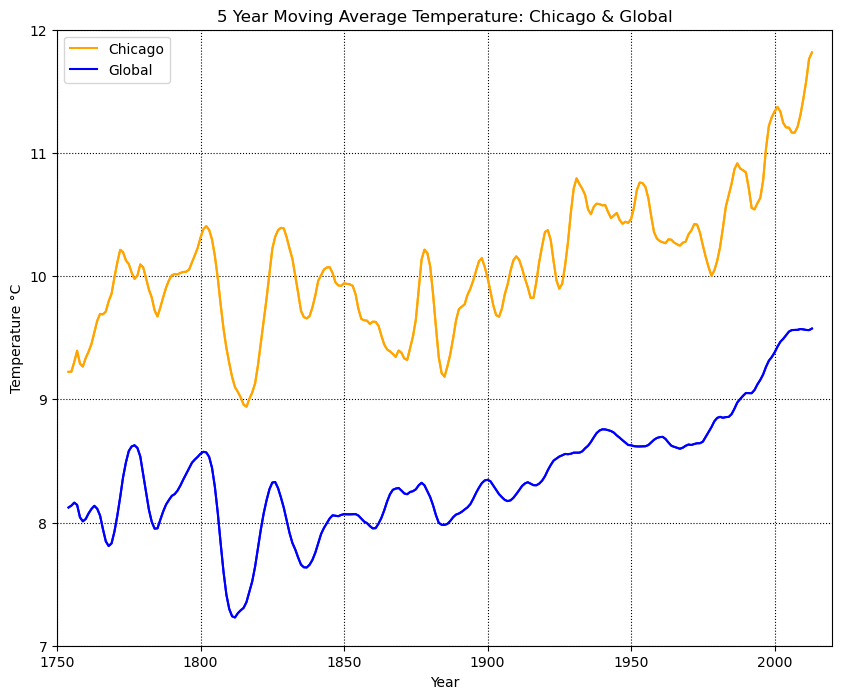

In [43]:
# Plot both Chicago moving average and Global moving average
plt.plot(moving_avg_temp.chicagoMA, color = 'orange')
plt.plot(moving_avg_temp.globalMA, 'b-')

# Legend
plot1, = plt.plot(moving_avg_temp.chicagoMA, color = 'orange')
plot2, = plt.plot(moving_avg_temp.globalMA, 'b-')
plt.legend([plot1,plot2],["Chicago","Global"], loc = 2)
plt.title("5 Year Moving Average Temperature: Chicago & Global")
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.ylim(7,12)
plt.xlim(1750,2020)
plt.grid(True, color = 'k', linestyle = ':')
plt.style.use('default')

# Resize
from matplotlib import rcParams
rcParams ['figure.figsize'] = 10,8

### Correlation Determination
A quick Pearson correlation table was created to demonstrate the strong positive correlation between the two data sets.

In [44]:
# Pearson Correlation Coefficient
moving_avg_temp.drop('city', inplace = True, axis = 1)
moving_avg_temp.drop('global', inplace = True, axis = 1)
correlation = moving_avg_temp.corr(method = 'pearson')
print(correlation)

           chicagoMA  globalMA
chicagoMA   1.000000  0.871878
globalMA    0.871878  1.000000


# Observations

From the data visualization and Pearsons correlation coefficient, one can observe that both Chicago and Global weather data trendlines are positively correlated (r = 0.872). One can safely assume that the average temperature will continue to increase in the next several decades. Chicago is generally, at a minimum, 1°C warmer in any given year while also fluctuating more eradically than Global weather data from decade to decade. Around 1820, Global average temperature decreased more than 1°C.